# Process the data


### import libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read in the data

In [78]:
# read in xlsx file
df_weather = pd.read_excel('..\..\data\MC2\\raw\Meteorological_Data.xlsx')
df_sensor = pd.read_excel('..\..\data\MC2\\raw/Sensor_Data.xlsx')

### process the weather data

Interesting finds:
only month 4, 8, 12 are present in the weather data
month 8 misses days 1, 2, 3


In [79]:
# drop columns last 2 columns df_weather
df_weather = df_weather.drop(df_weather.columns[[3,4]], axis=1)
# drop empty rows
df_weather = df_weather.dropna()

In [84]:
df_weather.head()


,Date,Wind Direction,Wind Speed (m/s)
0,2016-04-01 00:00:00,190.5,4.0
1,2016-04-01 03:00:00,203.3,5.0
2,2016-04-01 06:00:00,201.1,5.2
3,2016-04-01 09:00:00,204.9,4.1
4,2016-04-01 12:00:00,207.0,3.6


In [111]:
weather_times = df_weather['Date'].unique()

<Axes: xlabel='Date'>

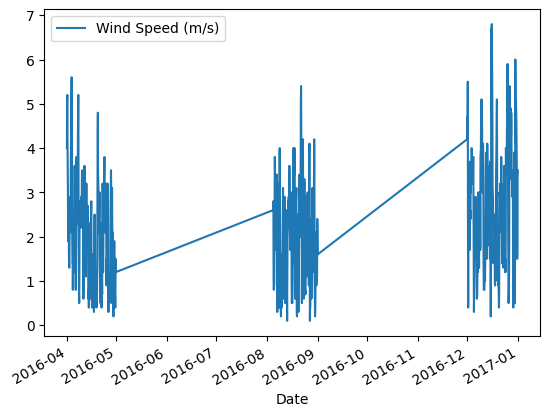

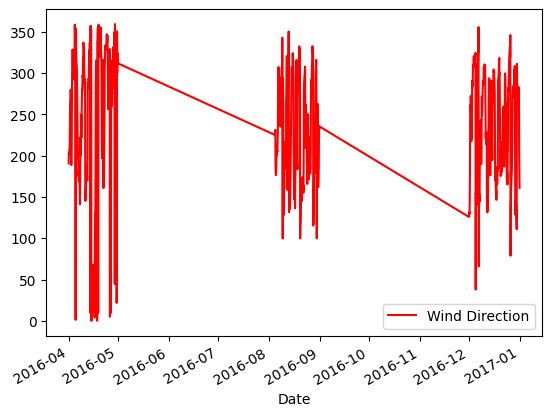

In [86]:
# make line plot of "Wind Speed" and "Wind Direction" over time next to each other
df_weather.plot(x='Date', y=['Wind Speed (m/s)'])
# red line
df_weather.plot(x='Date', y=['Wind Direction'], color='red')

In [87]:
# create three dataframes for the 4th, 8th, and 12th month
df_weather_4 = df_weather[df_weather['Date'].dt.month == 4]
df_weather_8 = df_weather[df_weather['Date'].dt.month == 8]
df_weather_12 = df_weather[df_weather['Date'].dt.month == 12]

In [95]:
# show all the days
df_weather_8['Date'].dt.day.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

[Text(1, 0, '4'), Text(2, 0, '8'), Text(3, 0, '12')]

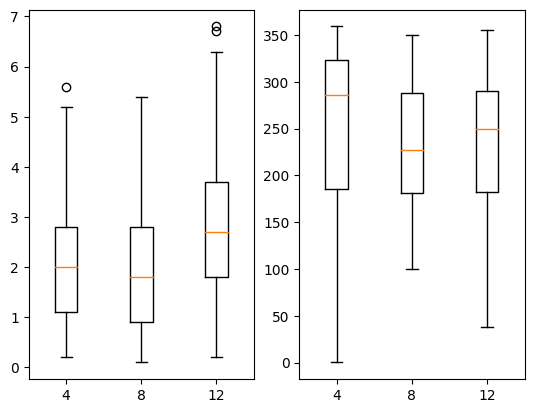

In [105]:
# plot the three dataframes on the same plot with boxplot put the boxplots in one figure next to each other. next to it put the same plot with wind direction
fig, ax = plt.subplots(1, 2)
ax[0].boxplot([df_weather_4['Wind Speed (m/s)'], df_weather_8['Wind Speed (m/s)'], df_weather_12['Wind Speed (m/s)']])
ax[0].set_xticklabels(['4', '8', '12'])
ax[1].boxplot([df_weather_4['Wind Direction'], df_weather_8['Wind Direction'], df_weather_12['Wind Direction']])
ax[1].set_xticklabels(['4', '8', '12'])

<Axes: xlabel='Date'>

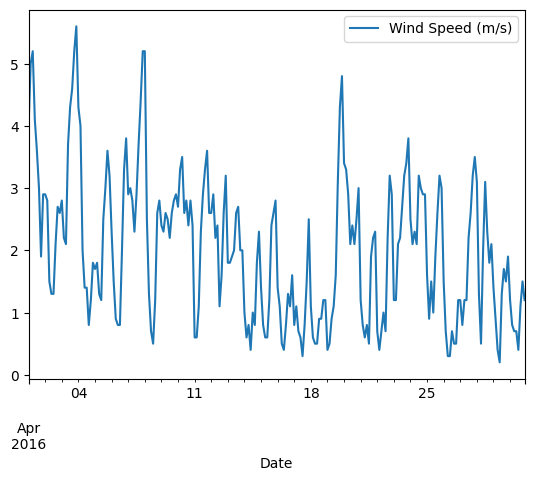

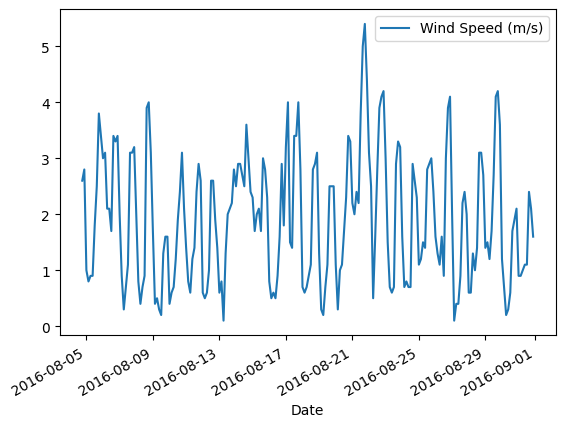

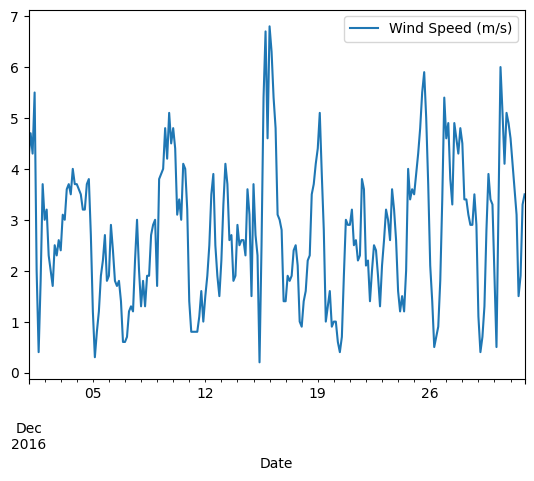

In [104]:
# plot 3 line plots next to each other
df_weather_4.plot(x='Date', y=['Wind Speed (m/s)'])
df_weather_8.plot(x='Date', y=['Wind Speed (m/s)'])
df_weather_12.plot(x='Date', y=['Wind Speed (m/s)'])

In [107]:
df_weather_8

,Date,Wind Direction,Wind Speed (m/s)
240,2016-08-04 18:00:00,225.0,2.6
241,2016-08-04 21:00:00,229.7,2.8
242,2016-08-05 00:00:00,231.1,1.0
243,2016-08-05 03:00:00,187.2,0.8
244,2016-08-05 06:00:00,178.7,0.9
...,...,...,...
453,2016-08-31 09:00:00,185.9,1.1
454,2016-08-31 12:00:00,215.1,1.1
455,2016-08-31 15:00:00,236.0,2.4
456,2016-08-31 18:00:00,232.4,2.1


<Axes: xlabel='Date'>

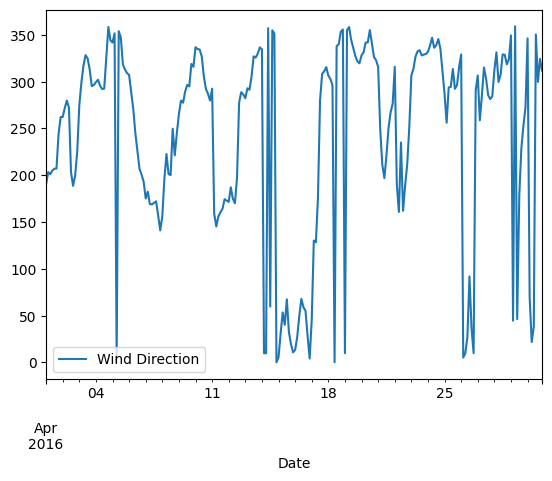

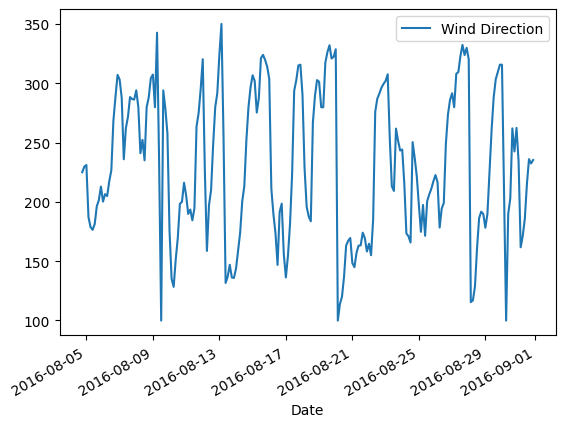

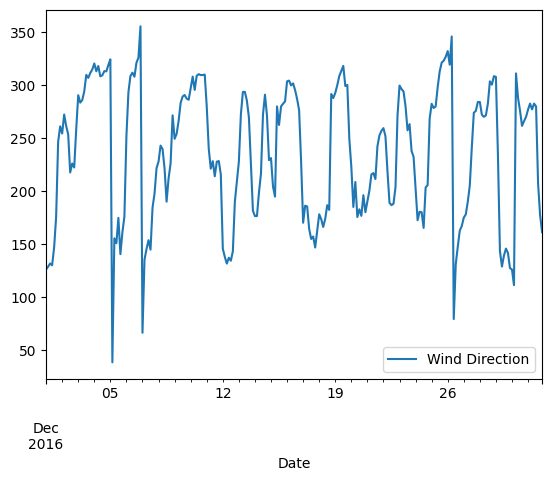

In [110]:
# plot 3 line plots next to each other
df_weather_4.plot(x='Date', y=['Wind Direction'])
df_weather_8.plot(x='Date', y=['Wind Direction'])
df_weather_12.plot(x='Date', y=['Wind Direction'])

### process the sensor data

In [82]:
df_sensor = df_sensor.dropna()

In [67]:
df_sensor.head(100)

,Chemical,Monitor,Date Time,Reading
0,Methylosmolene,3,2016-04-01 00:00:00,2.683820
1,Methylosmolene,7,2016-04-01 00:00:00,2.630640
2,Chlorodinine,3,2016-04-01 00:00:00,1.259170
3,Chlorodinine,7,2016-04-01 00:00:00,0.943983
4,AGOC-3A,3,2016-04-01 00:00:00,0.722303
...,...,...,...,...
95,AGOC-3A,1,2016-04-01 02:00:00,0.203970
96,Appluimonia,8,2016-04-01 02:00:00,0.188443
97,Chlorodinine,9,2016-04-01 02:00:00,0.165901
98,Appluimonia,1,2016-04-01 02:00:00,0.098335


In [27]:
df_sensor.columns

Index(['Chemical', 'Monitor', 'Date Time ', 'Reading'], dtype='object')

In [48]:
sensor_times = df_sensor['Date Time '].unique()
chemicals = df_sensor['Chemical'].unique()
monitors = df_sensor['Monitor'].unique()

In [112]:
chemicals

array(['Methylosmolene', 'Chlorodinine', 'AGOC-3A', 'Appluimonia'],
      dtype=object)

In [113]:
# create a dataframe for each chemical
df_meth = df_sensor[df_sensor['Chemical'] == chemicals[0]]
df_chlor = df_sensor[df_sensor['Chemical'] == chemicals[1]]
df_agoc = df_sensor[df_sensor['Chemical'] == chemicals[2]]
df_appl = df_sensor[df_sensor['Chemical'] == chemicals[3]]

In [122]:
# give summary statistics for each chemical and put it in a table
df_meth.describe()




,Monitor,Reading
count,19597.000000,19597.000000
mean,4.994387,0.719450
std,2.586603,2.547469
min,1.000000,0.001003
25%,3.000000,0.194614
50%,5.000000,0.386876
75%,7.000000,0.735009
max,9.000000,100.776400
